In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("file:///C:/Users/Abdullah%20Fazili/Downloads/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   order_id   185950 non-null  int64  
 1   product    185950 non-null  object 
 2   quantity   185950 non-null  int64  
 3   price      185950 non-null  float64
 4   total      185950 non-null  float64
 5   full_date  185950 non-null  object 
 6   hour       185950 non-null  int64  
 7   date       185950 non-null  int64  
 8   month      185950 non-null  int64  
 9   year       185950 non-null  int64  
 10  day        185950 non-null  object 
 11  address    185950 non-null  object 
 12  city       185950 non-null  object 
 13  state      185950 non-null  object 
 14  pincode    185950 non-null  int64  
 15  timezone   185950 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 22.7+ MB


In [4]:
df.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,iPhone,1,700.00,700.00,08/06/19,14,6,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19,19,15,8,2019,Thu,736 14th St,New York City,NY,10001,PM


In [5]:
df.shape

(185950, 16)

`16 features`

In [6]:
df.isnull().sum()

order_id     0
product      0
quantity     0
price        0
total        0
full_date    0
hour         0
date         0
month        0
year         0
day          0
address      0
city         0
state        0
pincode      0
timezone     0
dtype: int64

### Q1 1. What is the 4th highest product sold in terms of total revenue generated overall ?

In [7]:
temp = df.groupby(["product"])['price'].sum().sort_values( ascending=False)
temp

product
Macbook Pro Laptop            8030800.00
iPhone                        4789400.00
ThinkPad Laptop               4127958.72
Google Phone                  3315000.00
27in 4K Gaming Monitor        2429637.70
34in Ultrawide Monitor        2348718.19
Apple Airpods Headphones      2332350.00
Flatscreen TV                 1440000.00
Bose SoundSport Headphones    1332366.75
27in FHD Monitor              1125974.93
Vareebadd Phone                826000.00
20in Monitor                   451068.99
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       323787.10
USB-C Charging Cable           261740.85
Wired Headphones               226395.18
AA Batteries (4-pack)           79015.68
AAA Batteries (4-pack)          61716.59
Name: price, dtype: float64

<AxesSubplot:xlabel='product'>

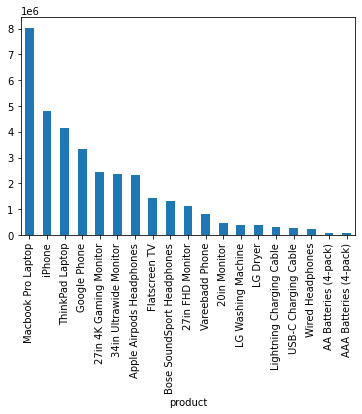

In [8]:
temp.plot(x='product',kind='bar')

### 4th highest sold product
* Google Phone    generating a revenue of              3315000.00

### Q2  Which City sees the maximum number of orders being placed in the month of June 2019?


In [9]:
df_2 = df[df['month'] == 8]
df_2 = df[df['year']==2019]

#### Now df_2 contains only data of june 2019

<AxesSubplot:xlabel='city'>

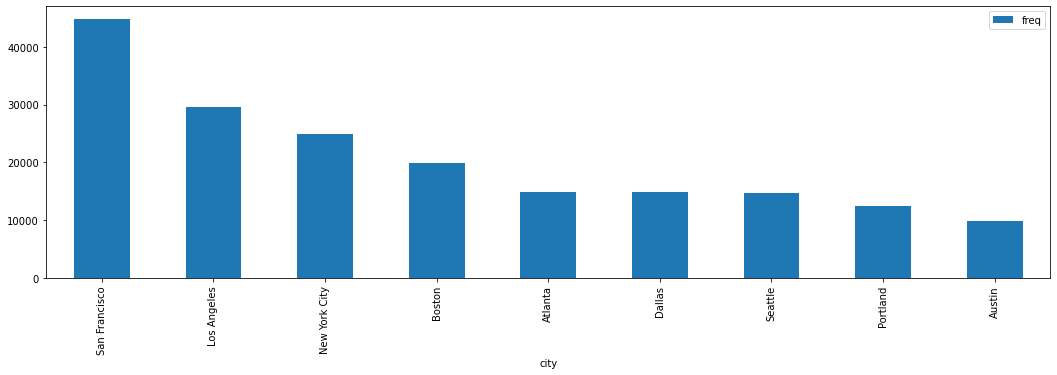

In [10]:
data = []

for city in df_2['city'].unique():
    data.append([city , len(df[df['city']  == city])])
pd.DataFrame(data,columns = ['city','freq']).sort_values(by='freq', ascending=False).plot(x = 'city', y = 'freq', kind = 'bar', figsize = (18,5))    

#### San Francisco has the maximum number of orders placed in the month of June 2019

### Q3 . What is the least popular product in terms of unique orders in the city of Los Angeles. ?

In [11]:
df_3 = df[df['city'] == 'Los Angeles']
df_3.head(3)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
6,236676,34in Ultrawide Monitor,1,379.99,379.99,08/04/19,19,4,8,2019,Sun,470 Cherry St,Los Angeles,CA,90001,PM
9,236679,Macbook Pro Laptop,1,1700.00,1700.00,08/07/19,15,7,8,2019,Wed,239 Spruce St,Los Angeles,CA,90001,PM


<AxesSubplot:xlabel='product'>

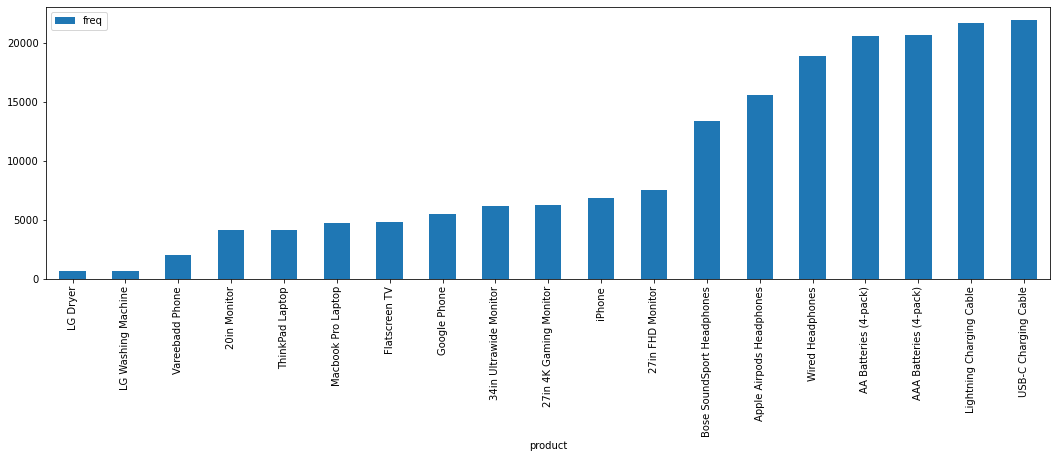

In [12]:
data = []

for product in df_3['product'].unique():
    data.append([product , len(df[df['product']  == product])])
pd.DataFrame(data,columns = ['product','freq']).sort_values(by='freq', ascending=True).plot(x = 'product', y = 'freq', kind = 'bar', figsize = (18,5))    

` Lg Dryer is the least bought item`

### Q4 Which state has the highest revenue generated from all the apple products in year 2019?

In [13]:
df['product'].unique()

array(['Wired Headphones', 'Bose SoundSport Headphones', 'iPhone',
       'AA Batteries (4-pack)', '34in Ultrawide Monitor', '20in Monitor',
       'Macbook Pro Laptop', 'LG Washing Machine', '27in FHD Monitor',
       'Lightning Charging Cable', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'USB-C Charging Cable',
       '27in 4K Gaming Monitor', 'ThinkPad Laptop', 'Flatscreen TV',
       'Google Phone', 'Vareebadd Phone', 'LG Dryer'], dtype=object)

In [14]:
temp = df[df['product'] == 'Macbook Pro Laptop']
temp1 = df[df['product'] == 'iPhone']
temp2= df[df['product'] == 'Apple Airpods Headphones']

In [15]:
df_4 = pd.concat([temp,temp1,temp2])

`Can also be done using isin function but here logical implementation is done`

In [16]:
df_4['product'].unique()

array(['Macbook Pro Laptop', 'iPhone', 'Apple Airpods Headphones'],
      dtype=object)

In [17]:
temp = df_4.groupby(['state'])['price'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='state'>

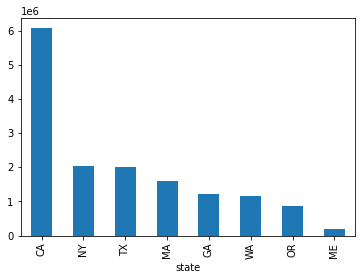

In [18]:
temp.plot(x='state',kind='bar')

### CA sold the most Apple Products`

### Q5 What is the difference of revenue generated between weekend and weekday in the state of CA ?


In [19]:
df['day'].unique()


array(['Sat', 'Thu', 'Tue', 'Fri', 'Sun', 'Wed', 'Mon'], dtype=object)

In [20]:
weekdays = df.loc[df['day'].isin(['Thu', 'Tue', 'Wed', 'Mon'])]
weekdays = weekdays[weekdays['state'] == 'CA']
weekdays.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
7,236677,20in Monitor,1,109.99,109.99,08/13/19,7,13,8,2019,Tue,918 6th St,San Francisco,CA,94016,AM
9,236679,Macbook Pro Laptop,1,1700.00,1700.00,08/07/19,15,7,8,2019,Wed,239 Spruce St,Los Angeles,CA,90001,PM
18,236688,34in Ultrawide Monitor,1,379.99,379.99,08/08/19,16,8,8,2019,Thu,821 7th St,Los Angeles,CA,90001,PM
19,236689,AAA Batteries (4-pack),1,2.99,2.99,08/21/19,10,21,8,2019,Wed,13 Cedar St,San Francisco,CA,94016,AM


In [21]:
weekend = df.loc[df['day'].isin(['Sat', 'Fri', 'Sun'])]
weekend = weekend[weekend['state']=='CA']
weekend.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
5,236675,Wired Headphones,1,11.99,11.99,08/02/19,23,2,8,2019,Fri,470 Hill St,San Francisco,CA,94016,PM
6,236676,34in Ultrawide Monitor,1,379.99,379.99,08/04/19,19,4,8,2019,Sun,470 Cherry St,Los Angeles,CA,90001,PM
8,236678,Wired Headphones,1,11.99,11.99,08/25/19,20,25,8,2019,Sun,58 9th St,San Francisco,CA,94016,PM
10,236680,LG Washing Machine,1,600.00,600.00,08/09/19,19,9,8,2019,Fri,967 Willow St,San Francisco,CA,94016,PM
25,236695,Bose SoundSport Headphones,1,99.99,99.99,08/04/19,19,4,8,2019,Sun,905 Pine St,San Francisco,CA,94016,PM


In [22]:
weekdays['total'].sum().round()

7915690.0

In [23]:
weekend['total'].sum().round()

5799085.0

In [24]:
7915690.0 - 5799085.0

2116605.0

` Difference bw weekdays and weekend is 2116605.0`

### Q6. Which city has seen the overall least orders in night hours in the months of May, June and July 2019. 


In [25]:
df_3 = df.loc[df['month'].isin([5,6,7])]
df_3 = df_3[df_3['year'] == 2019]
night_hours = df_3[(df_3.hour>=18) & (df_3.hour<=24)]
night_hours.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
27116,222915,Bose SoundSport Headphones,1,99.99,99.99,07/03/19,18,3,7,2019,Wed,899 Elm St,San Francisco,CA,94016,PM
27117,222916,Google Phone,1,600.00,600.00,07/21/19,22,21,7,2019,Sun,745 Chestnut St,New York City,NY,10001,PM
27119,222918,USB-C Charging Cable,1,11.95,11.95,07/14/19,21,14,7,2019,Sun,207 1st St,Los Angeles,CA,90001,PM
27123,222922,34in Ultrawide Monitor,1,379.99,379.99,07/20/19,21,20,7,2019,Sat,616 Chestnut St,Dallas,TX,75001,PM
27125,222924,Bose SoundSport Headphones,1,99.99,99.99,07/13/19,20,13,7,2019,Sat,444 Spruce St,San Francisco,CA,94016,PM


<AxesSubplot:xlabel='city'>

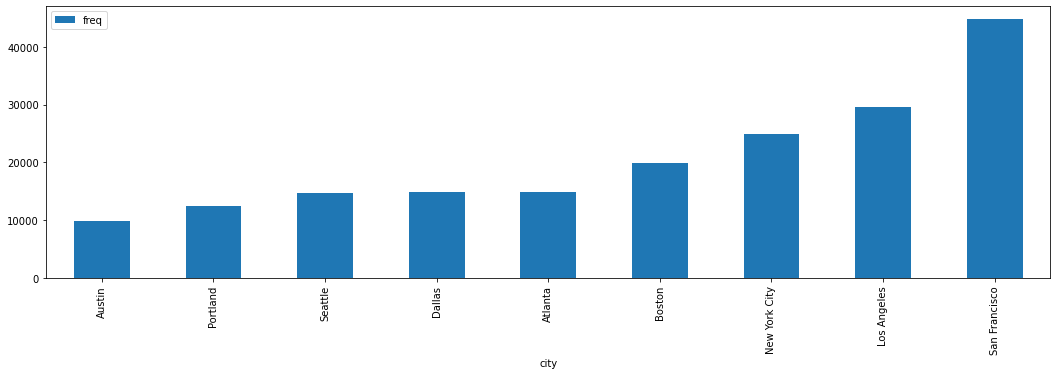

In [26]:
data = []

for city  in night_hours['city'].unique():
    data.append([city , len(df[df['city']  == city])])
pd.DataFrame(data,columns = ['city','freq']).sort_values(by='freq', ascending=True).plot(x = 'city', y = 'freq', kind = 'bar', figsize = (18,5))    

#### Austin has the least number of orders for the month of May,June and July 2019 bw 18-24

### Q7. Is “Google Phone” better performing in respect to overall number of orders placed as well as revenue generated than “iphone” in “New York City” ?


In [27]:
df.head(1)

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM


In [28]:
df_3 = df[df['city'] == 'New York City']
Google_phone = df_3[df_3['product'] == 'Google Phone' ]
Iphone = df_3[df_3['product'] == 'iPhone']

In [29]:
Google_phone['total'].sum()

454800.0

In [30]:
Iphone['total'].sum()

616700.0

In [31]:
Google_phone['order_id'].nunique()

757

In [32]:
Iphone['order_id'].nunique()

881

#### Iphone has a higher revenue than Google Phone and also more orders are placed for Iphone

### Q8. What is the absolute difference in total number of unique orders being created in the cities of “Boston” and “Portland” for the month of Jan in both years 2019 & 2020 ?


In [33]:
df_4 = df[df['month'] == 1]
df_4 = df_4.loc[df_4['year'].isin([2019,2020])]
df_4.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
95086,297150,Lightning Charging Cable,1,14.95,14.95,01/01/20,0,1,1,2020,Wed,427 Wilson St,Dallas,TX,75001,AM
95786,297817,iPhone,1,700.00,700.00,01/01/20,0,1,1,2020,Wed,519 13th St,New York City,NY,10001,AM
95787,297817,Lightning Charging Cable,2,14.95,29.90,01/01/20,0,1,1,2020,Wed,519 13th St,New York City,NY,10001,AM
95946,297969,Google Phone,1,600.00,600.00,01/01/20,0,1,1,2020,Wed,542 2nd St,San Francisco,CA,94016,AM
96327,298344,Wired Headphones,4,11.99,47.96,01/01/20,3,1,1,2020,Wed,731 7th St,New York City,NY,10001,AM


In [34]:
boston = df_4[df_4['city']=='Boston']

In [35]:
portland = df_4[df_4['city'] == 'Portland']

In [36]:
boston['order_id'].nunique()

1000

In [37]:
portland['order_id'].nunique()

608

In [38]:
print("absolute difference in total number of unique orders being created in the cities of 'Boston' and 'Portland' for the month of Jan in both years 2019 & 2020 = ")
1000 - 608

absolute difference in total number of unique orders being created in the cities of 'Boston' and 'Portland' for the month of Jan in both years 2019 & 2020 = 


392

### Pie Charts

### Q9. Plot pie chart for 4 categories based on their total revenue generated. 

In [39]:
day = df[(df.hour>=18) & (df.hour<=24)]

In [40]:

revenue_weekend = weekend['total'].sum()
revenue_weekend

5799084.76

In [41]:
revenue_weekday = weekdays['total'].sum()
revenue_weekday

7915689.949999999

In [42]:
revenue_night = night_hours['total'].sum()
revenue_night

2881509.67

In [43]:
revenue_day = day['total'].sum()
revenue_day

11742857.59

#### Weekend and Weekday

([<matplotlib.patches.Wedge at 0x1b6f8c92790>,
 [Text(0.2640593127231107, 1.067835511380006, 'weekend'),
  Text(-0.2640593127231113, -1.0678355113800058, 'weekday')])

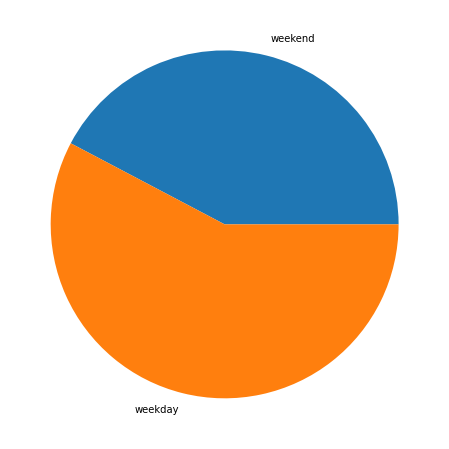

In [44]:
y = np.array([revenue_weekend,revenue_weekday])
labels = ["weekend","weekday"]
plt.figure(figsize=(15,8))
plt.pie(y,labels = labels)


### Weekend and Night

([<matplotlib.patches.Wedge at 0x1b6f8cd6370>,
 [Text(-0.5541393900068972, 0.9502260449191993, 'weekend'),
  Text(0.5541393010403112, -0.9502260968014694, 'night')])

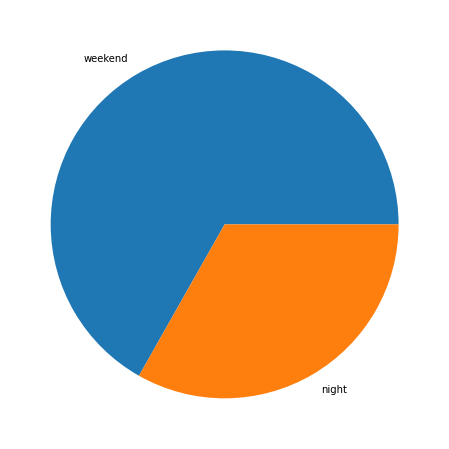

In [45]:
y = np.array([revenue_weekend,revenue_night])
labels = ["weekend","night"]
plt.figure(figsize=(15,8))
plt.pie(y,labels = labels)

### Weekend and day

([<matplotlib.patches.Wedge at 0x1b6f8d17250>,
 [Text(0.5582077099099018, 0.9478418394421841, 'weekend'),
  Text(-0.5582078873966075, -0.9478417349158121, 'day')])

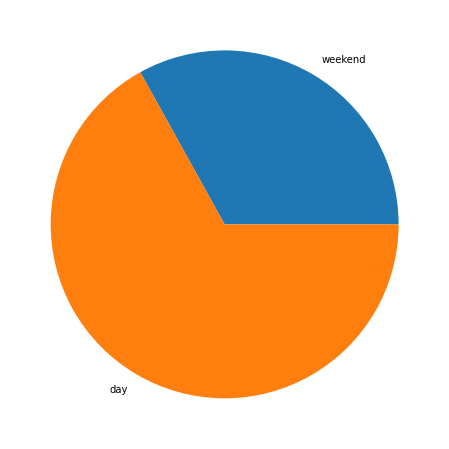

In [46]:
y = np.array([revenue_weekend,revenue_day])
labels = ["weekend","day"]
plt.figure(figsize=(15,8))
plt.pie(y,labels = labels)

### Weekday and night

([<matplotlib.patches.Wedge at 0x1b6f9b1fee0>,
 [Text(-0.7355067252131665, 0.8179424534563564, 'weekday'),
  Text(0.7355066486318639, -0.8179425223194624, 'night')])

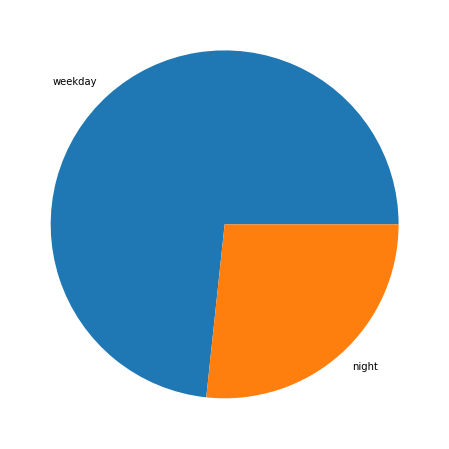

In [47]:
y = np.array([revenue_weekday,revenue_night])
labels = ["weekday","night"]
plt.figure(figsize=(15,8))
plt.pie(y,labels = labels)

### violin plot

In [52]:
year_2019 = df[df['year']==2019]

In [54]:
year_2019.head()

,order_id,product,quantity,price,total,full_date,hour,date,month,year,day,address,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,08/31/19,22,31,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,iPhone,1,700.00,700.00,08/06/19,14,6,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19,20,29,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19,19,15,8,2019,Thu,736 14th St,New York City,NY,10001,PM


In [94]:
year_2020 = df[df['year']==2020]
year_2020.shape

(34, 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Wired Headphones'),
  Text(1, 0, 'Bose SoundSport Headphones'),
  Text(2, 0, 'iPhone'),
  Text(3, 0, 'AA Batteries (4-pack)'),
  Text(4, 0, '34in Ultrawide Monitor'),
  Text(5, 0, '20in Monitor'),
  Text(6, 0, 'Macbook Pro Laptop'),
  Text(7, 0, 'LG Washing Machine'),
  Text(8, 0, '27in FHD Monitor'),
  Text(9, 0, 'Lightning Charging Cable'),
  Text(10, 0, 'Apple Airpods Headphones'),
  Text(11, 0, 'AAA Batteries (4-pack)'),
  Text(12, 0, 'USB-C Charging Cable'),
  Text(13, 0, '27in 4K Gaming Monitor'),
  Text(14, 0, 'ThinkPad Laptop'),
  Text(15, 0, 'Flatscreen TV'),
  Text(16, 0, 'Google Phone'),
  Text(17, 0, 'Vareebadd Phone'),
  Text(18, 0, 'LG Dryer')])

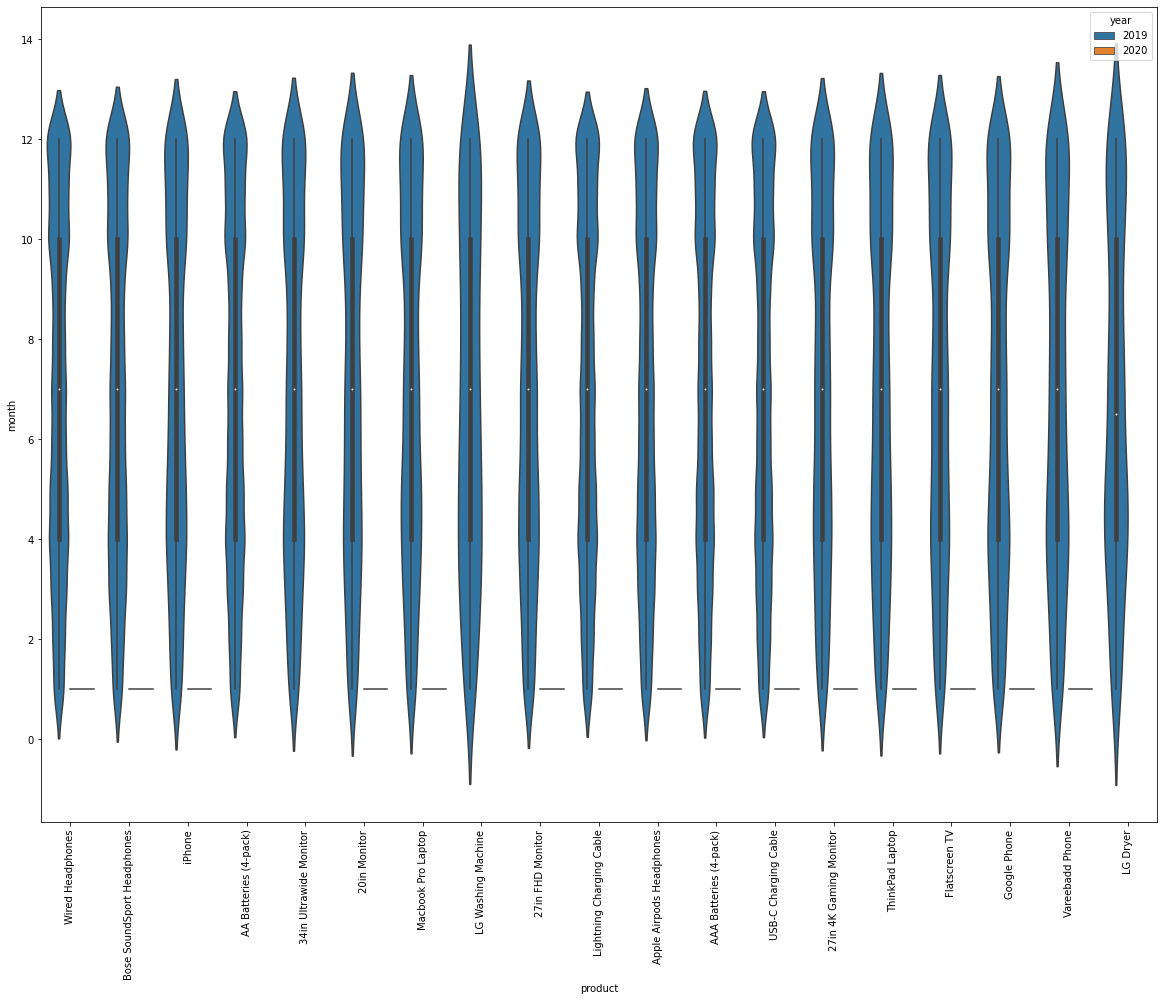

In [99]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='product',y='month',hue='year')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2.99'),
  Text(1, 0, '3.84'),
  Text(2, 0, '11.95'),
  Text(3, 0, '11.99'),
  Text(4, 0, '14.95'),
  Text(5, 0, '99.99'),
  Text(6, 0, '109.99'),
  Text(7, 0, '149.99'),
  Text(8, 0, '150.0'),
  Text(9, 0, '300.0'),
  Text(10, 0, '379.99'),
  Text(11, 0, '389.99'),
  Text(12, 0, '400.0'),
  Text(13, 0, '600.0'),
  Text(14, 0, '700.0'),
  Text(15, 0, '999.99'),
  Text(16, 0, '1700.0')])

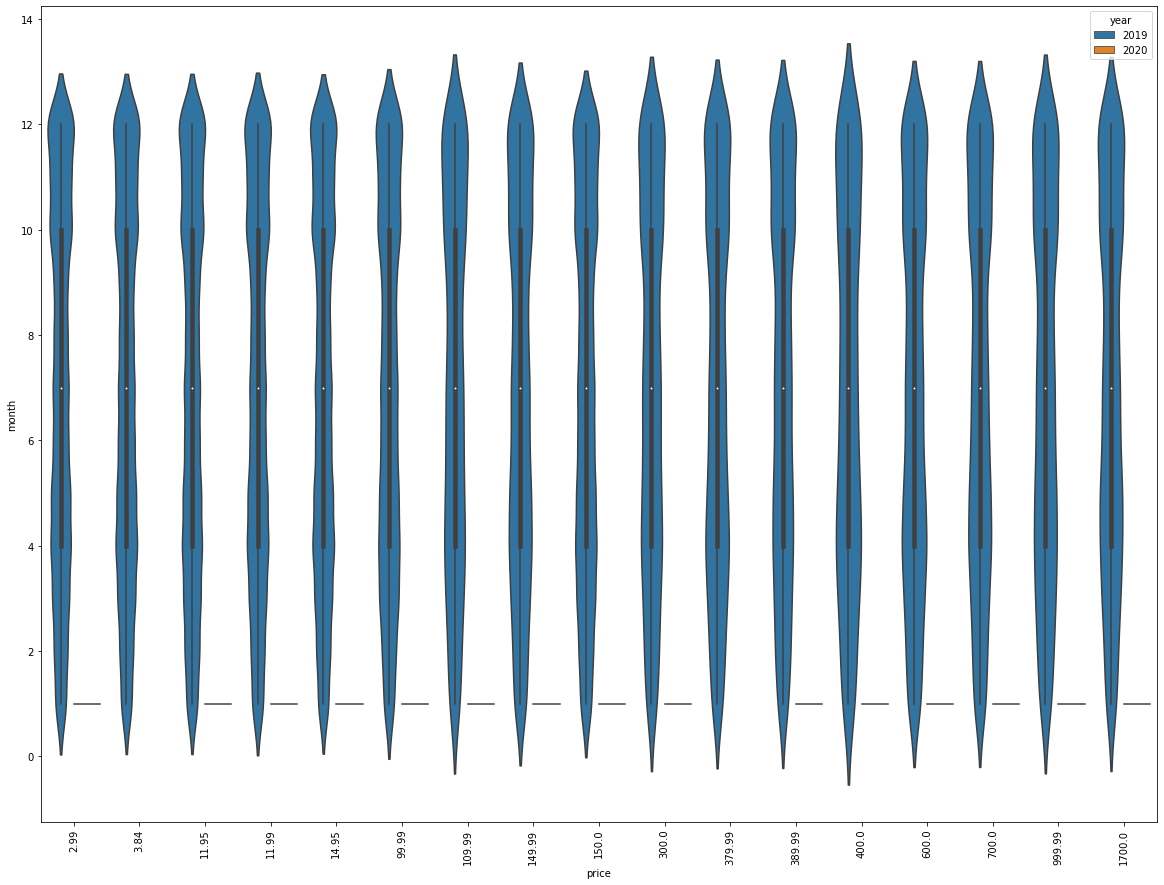

In [92]:
plt.figure(figsize=(20,15))
sns.violinplot(data=,x='price',y='month',hue='year')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

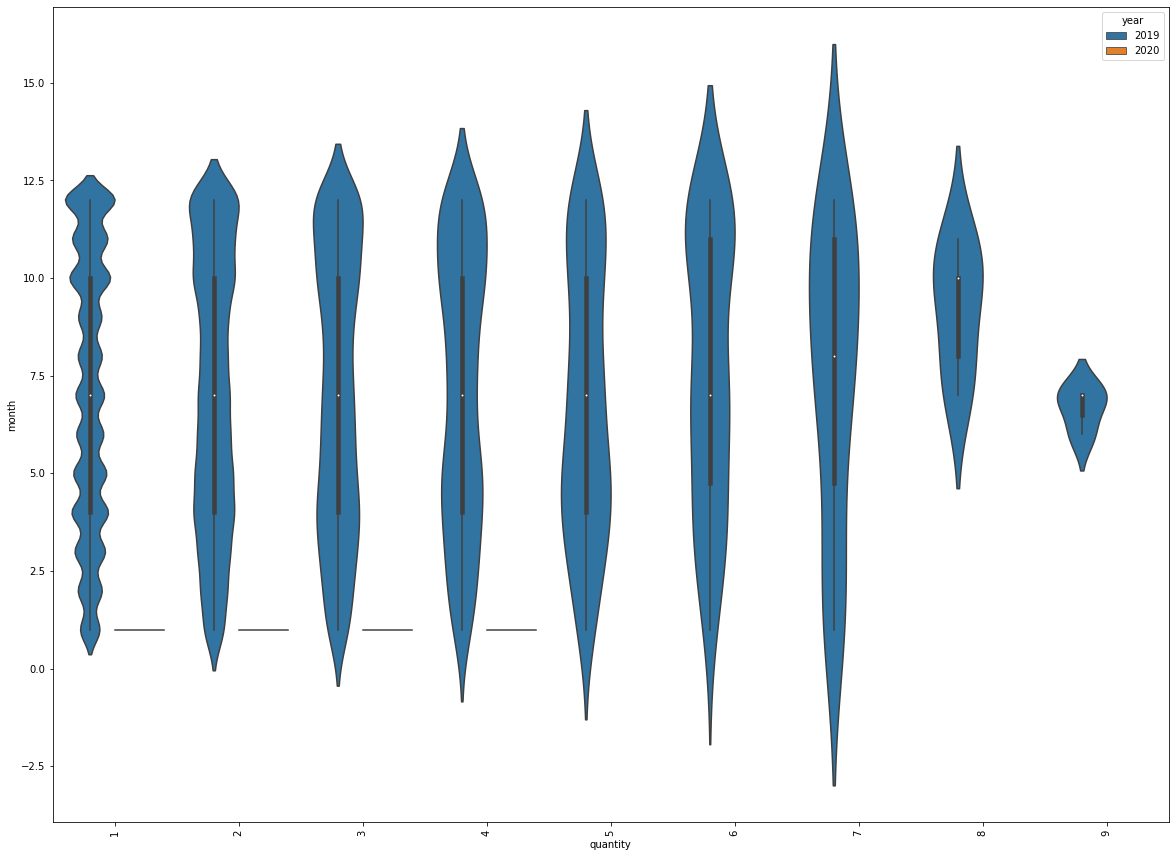

In [96]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='quantity',y='month',hue='year')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 [Text(0, 0, '2.99'),
  Text(1, 0, '3.84'),
  Text(2, 0, '5.98'),
  Text(3, 0, '7.68'),
  Text(4, 0, '8.97'),
  Text(5, 0, '11.52'),
  Text(6, 0, '11.95'),
  Text(7, 0, '11.96'),
  Text(8, 0, '11.99'),
  Text(9, 0, '14.95'),
  Text(10, 0, '15.36'),
  Text(11, 0, '17.94'),
  Text(12, 0, '19.2'),
  Text(13, 0, '20.93'),
  Text(14, 0, '23.04'),
  Text(15, 0, '23.9'),
  Text(16, 0, '23.92'),
  Text(17, 0, '23.98'),
  Text(18, 0, '26.88'),
  Text(19, 0, '26.91'),
  Text(20, 0, '29.9'),
  Text(21, 0, '35.85'),
  Text(22, 0, '35.97'),
  Text(23, 0, '44.85'),
  Text(24, 0, '47.8'),
  Text(25, 0, '47.96'),
  Text(26, 0, '59.75'),
  Text(27, 0, '59.8'),
  Text(28, 0, '71.7'),
  Text(29, 0, '99.99'),
  Text(30, 0, '109.99'),
  Text(31, 0, '149.99'),
  Tex

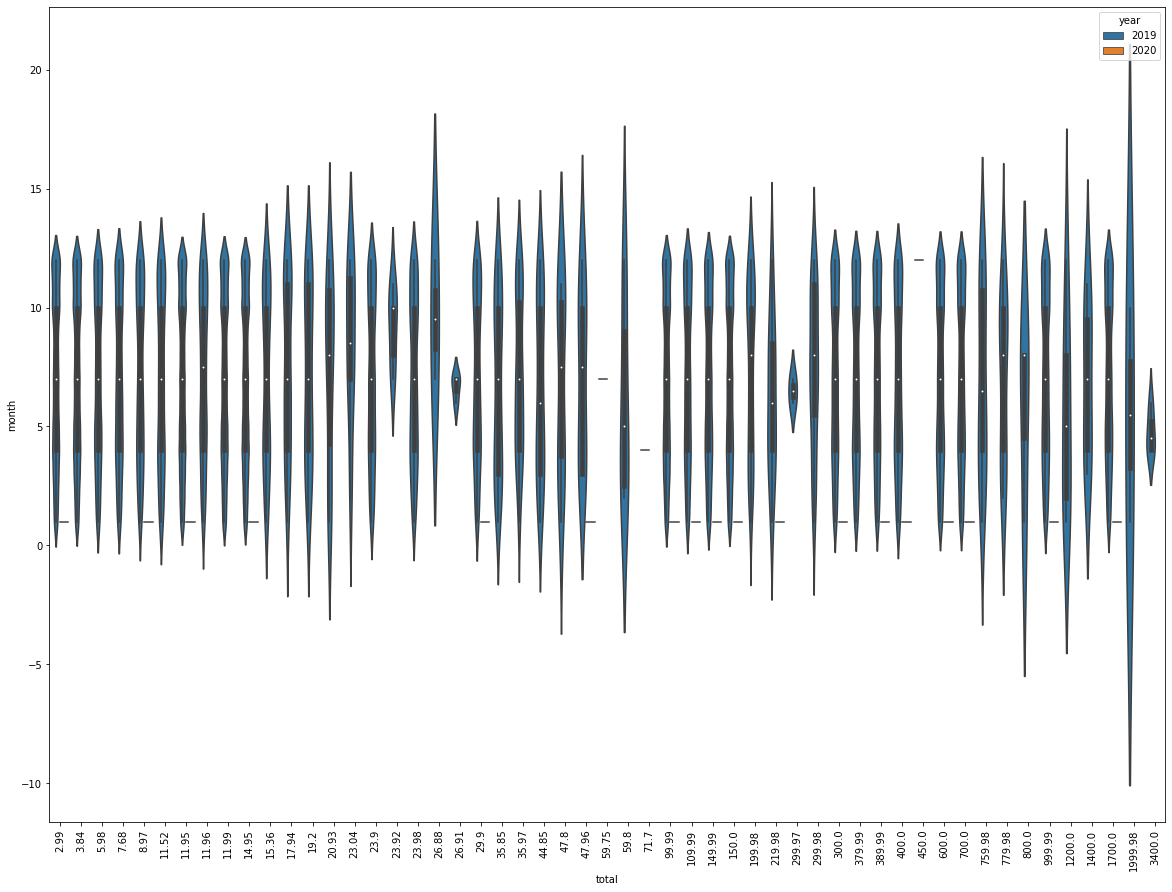

In [97]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='total',y='month',hue='year')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

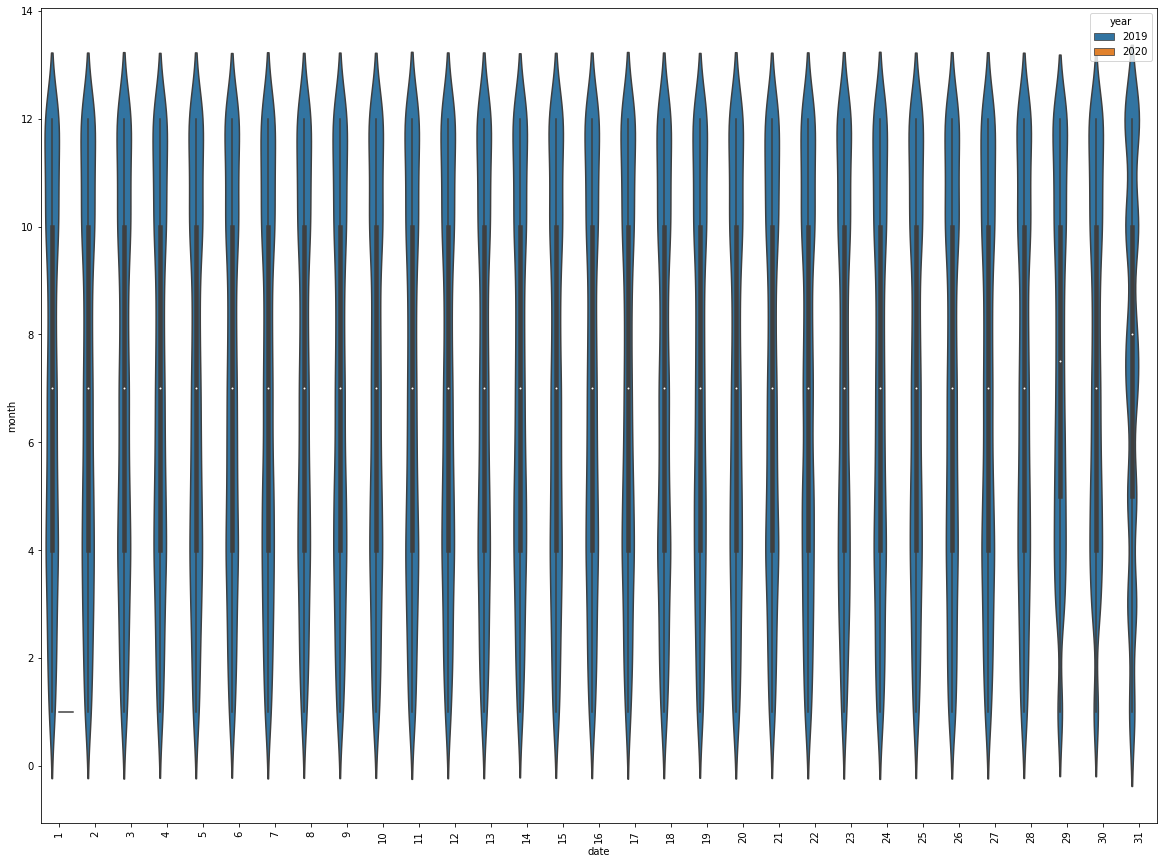

In [100]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='date',y='month',hue='year')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

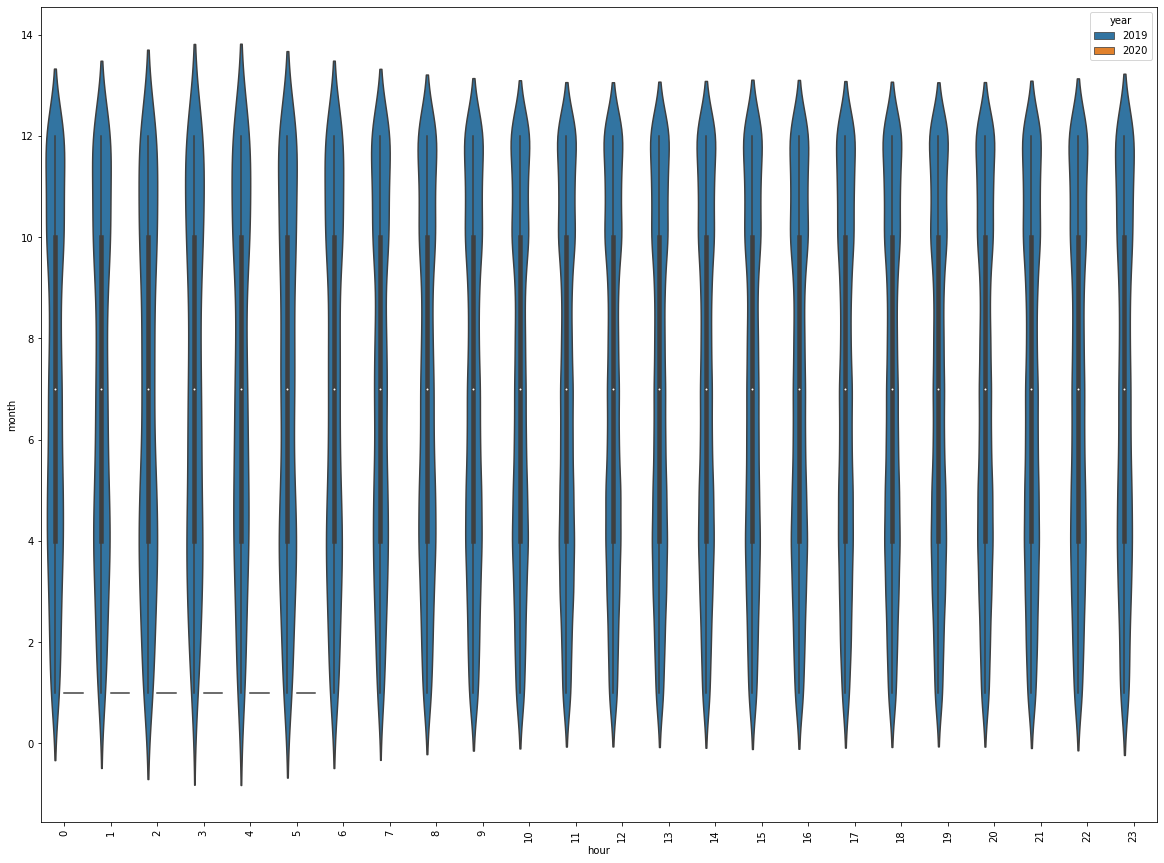

In [101]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='hour',y='month',hue='year')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Thu'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Fri'),
  Text(4, 0, 'Sun'),
  Text(5, 0, 'Wed'),
  Text(6, 0, 'Mon')])

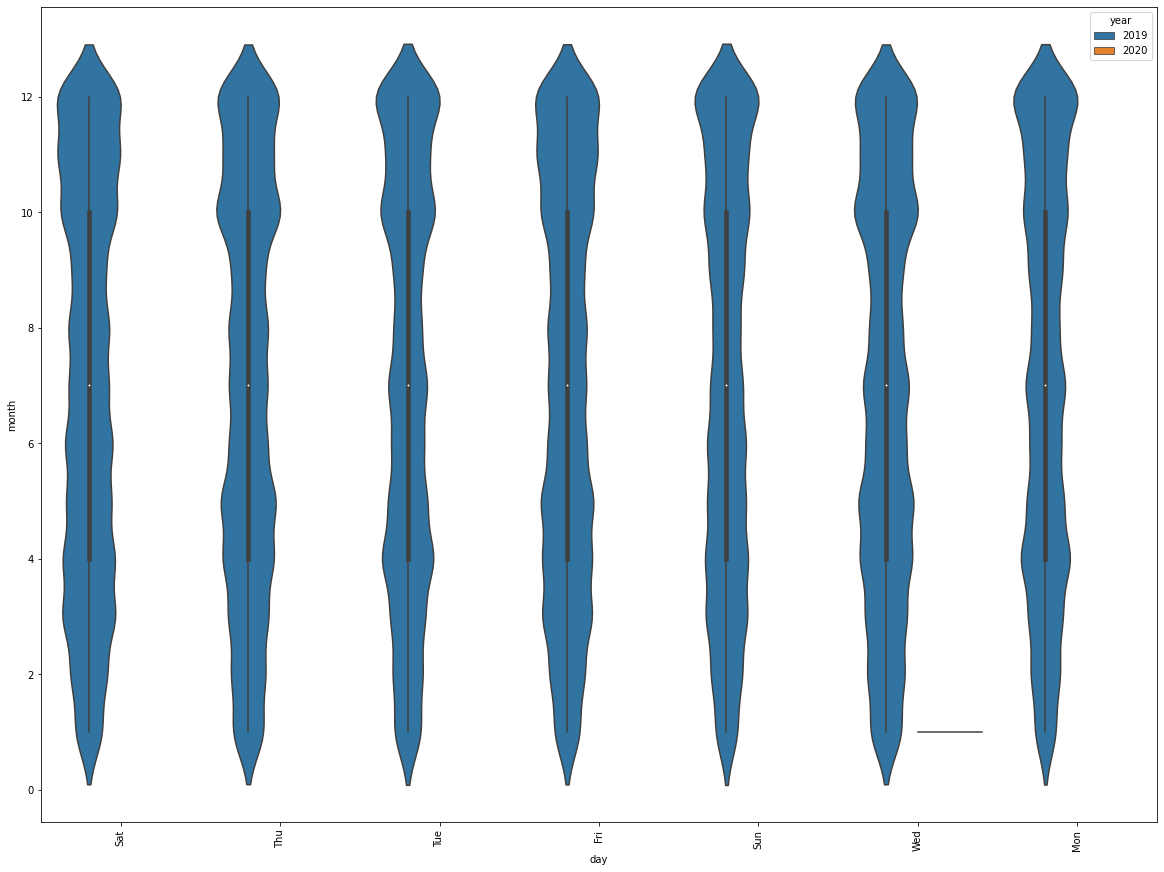

In [102]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='day',y='month',hue='year')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Seattle'),
  Text(1, 0, 'Dallas'),
  Text(2, 0, 'Portland'),
  Text(3, 0, 'Los Angeles'),
  Text(4, 0, 'New York City'),
  Text(5, 0, 'San Francisco'),
  Text(6, 0, 'Boston'),
  Text(7, 0, 'Atlanta'),
  Text(8, 0, 'Austin')])

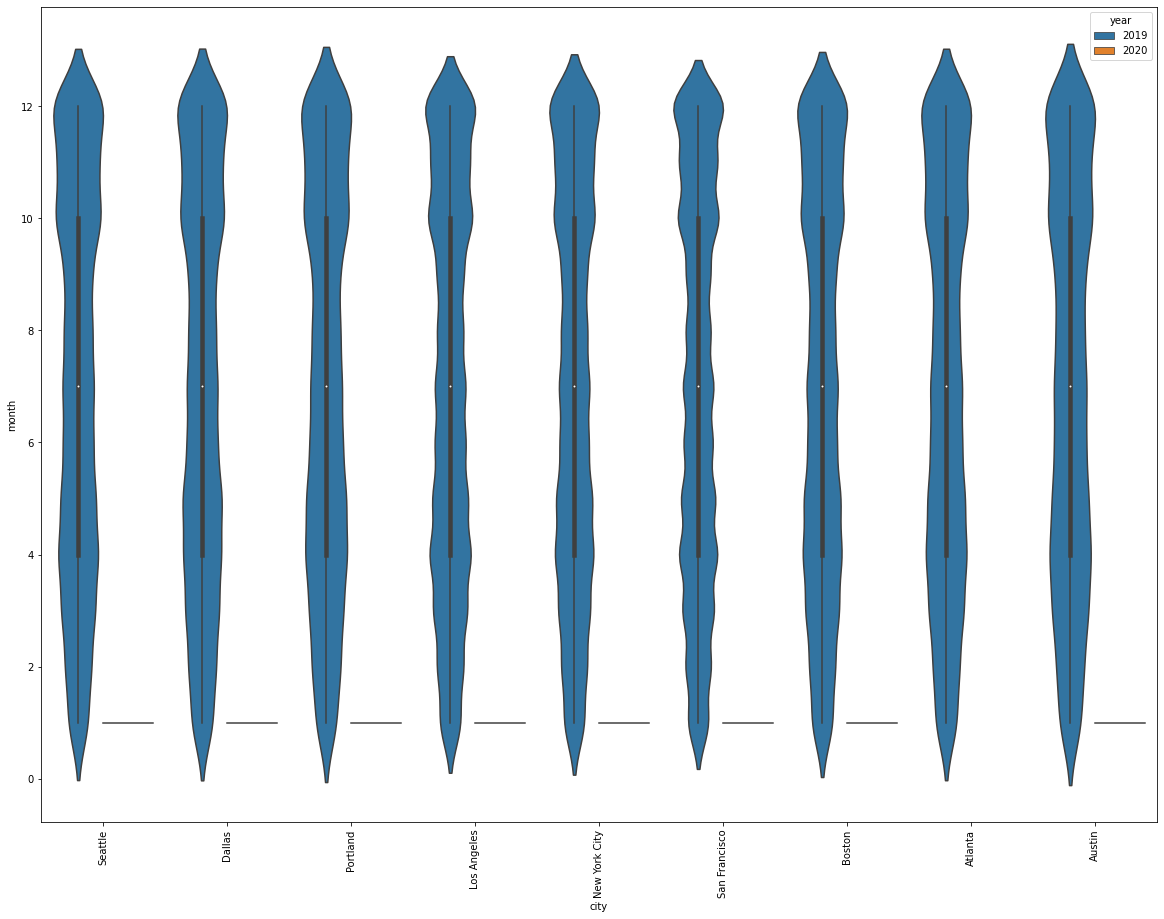

In [103]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='city',y='month',hue='year')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'WA'),
  Text(1, 0, 'TX'),
  Text(2, 0, 'OR'),
  Text(3, 0, 'CA'),
  Text(4, 0, 'NY'),
  Text(5, 0, 'MA'),
  Text(6, 0, 'GA'),
  Text(7, 0, 'ME')])

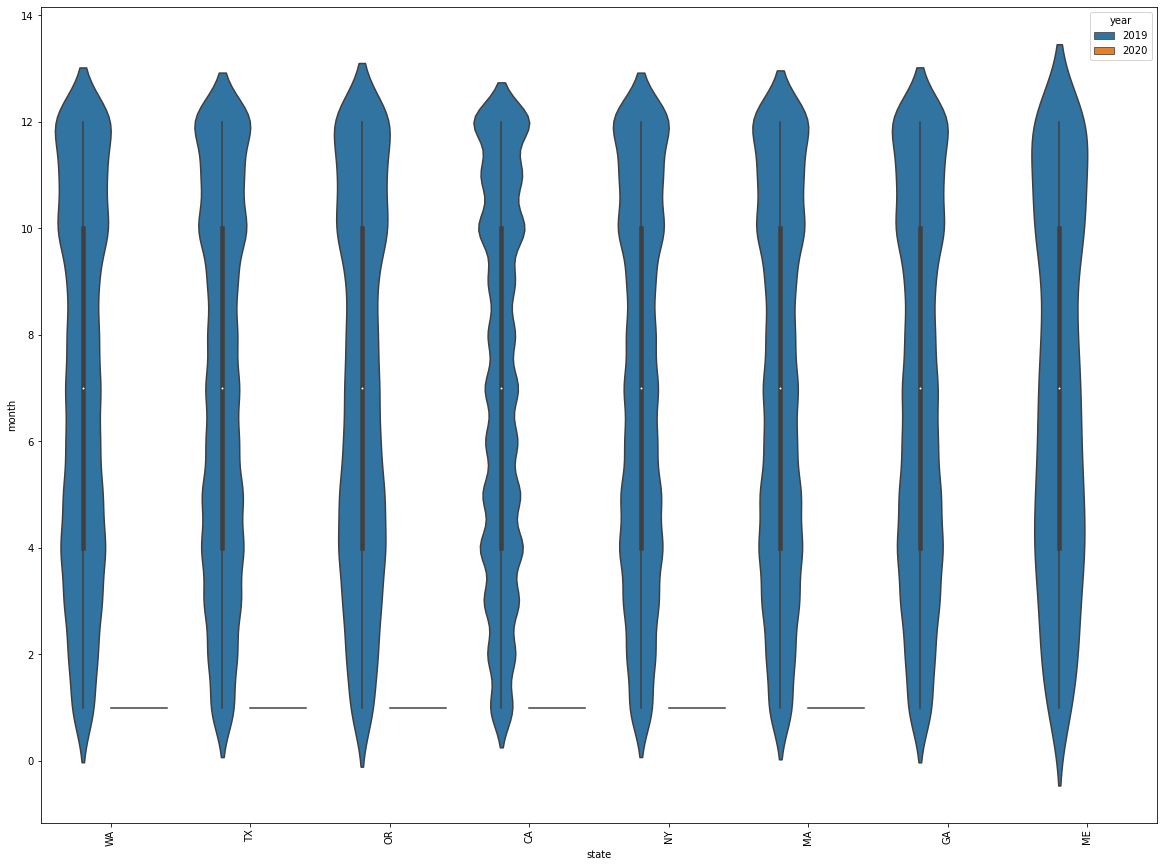

In [104]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='state',y='month',hue='year')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'PM'), Text(1, 0, 'AM')])

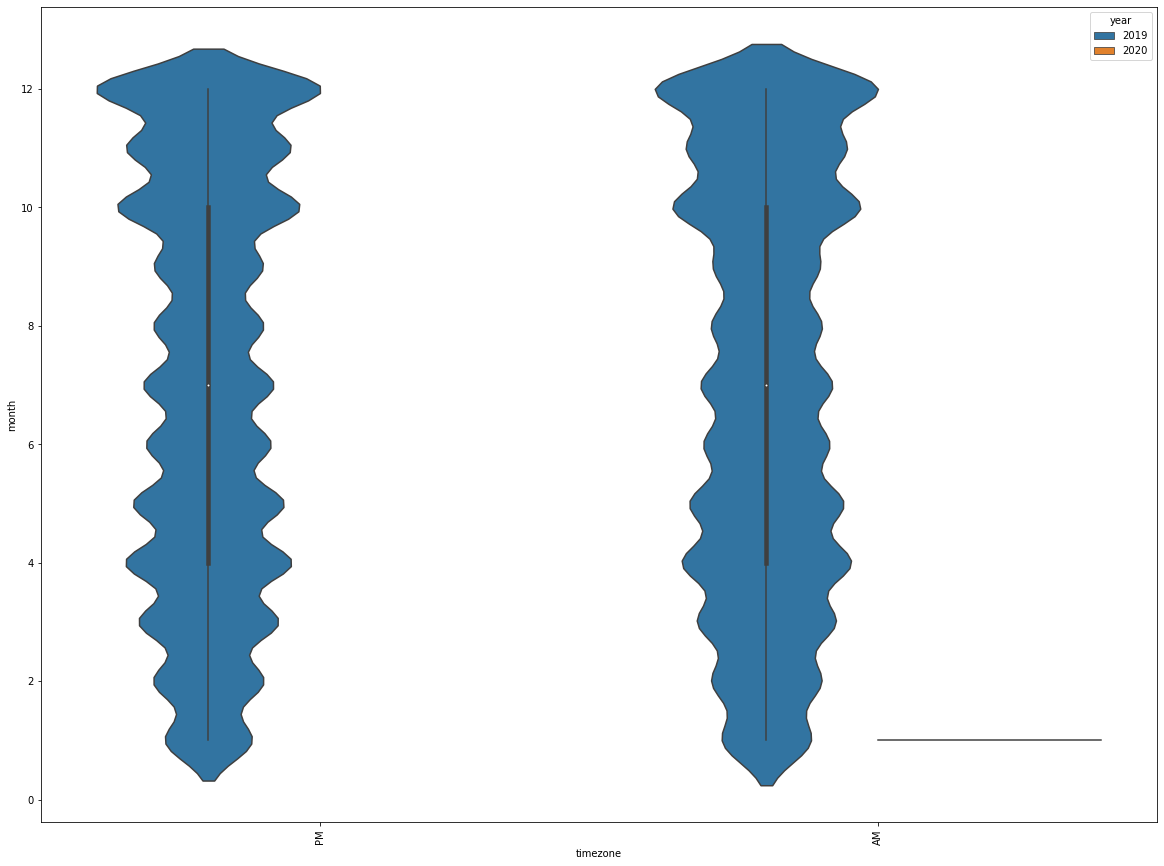

In [105]:
plt.figure(figsize=(20,15))
sns.violinplot(data=df,x='timezone',y='month',hue='year')
plt.xticks(rotation=90)

`inferneces`
* Data for 2020 is too low to be compared to 2019
* 